In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
X=pd.read_csv("./Diabetes_XTrain.csv")

In [83]:
y=pd.read_csv("./Diabetes_YTrain.csv")



In [84]:
a=X.mean()

In [85]:
a

Pregnancies                   3.758681
Glucose                     119.975694
BloodPressure                68.826389
SkinThickness                20.364583
Insulin                      76.166667
BMI                          31.857292
DiabetesPedigreeFunction      0.481519
Age                          32.954861
dtype: float64

In [86]:
for name1, values in X.iteritems():
    
    for i,j in enumerate(values):
        
        if j==0:
            X.at[i,name1]=a[name1]

In [87]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,20,76,27.8,0.237,58
2,7,147,76,20,76,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [88]:
X_train,y_train=X.values,y.values

In [89]:
X_train

array([[  7.   , 168.   ,  88.   , ...,  38.2  ,   0.787,  40.   ],
       [  8.   , 110.   ,  76.   , ...,  27.8  ,   0.237,  58.   ],
       [  7.   , 147.   ,  76.   , ...,  39.4  ,   0.257,  43.   ],
       ...,
       [  2.   , 122.   ,  60.   , ...,  29.8  ,   0.717,  22.   ],
       [  4.   , 154.   ,  72.   , ...,  31.3  ,   0.338,  37.   ],
       [  1.   ,  88.   ,  78.   , ...,  32.   ,   0.365,  29.   ]])

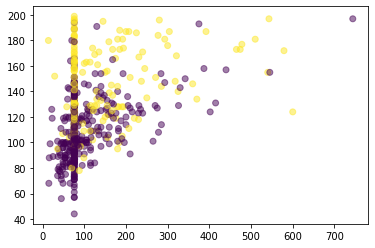

In [90]:
plt.scatter(X_train[:,4],X_train[:,1],c=y_train,alpha=0.5)


In [91]:
def dist(p1,p2):
    return (((p1[1]-p2[1])**2+(p1[6]-p2[6])**2)**0.5 +((p1[4]-p2[4])**2+(p1[6]-p2[6])**2)**0.5)/2

In [92]:
dist(X_train[8],X_train[9])

73.50016763236633

In [119]:
class kn:
    def __init__(self,k=5):
        self.k=k
    def fit(self,x,y):
        self.x=x
        self.y=y
    def dist(self,p1,p2):
        return np.linalg.norm(p1-p2)
        #return ((p1[7]-p2[7])**2+(p1[2]-p2[2])**2+(p1[6]-p2[6])**2+(p1[5]-p2[5])**2+(p1[4]-p2[4])**2+(p1[1]-p2[1])**2)**0.5
        #return ((p1[6]-p2[6])**2+(p1[1]-p2[1])**2)**0.5
    def predict(self,p):
        dists=[]
        
        for i in range(len(self.x)):
            dists.append((self.dist(self.x[i],p),i))
        dists=sorted(dists,key=lambda a:a[0])
        points=dists[:self.k]
        
        classes=[]
        
        for dist,i in points:
            classes.append(self.y[i])
        dic,counts = np.unique(classes,return_counts=True)
        fin = np.argmax(counts)
        return dic[fin]

In [120]:
kn_model=kn(6)

In [121]:
kn_model.fit(X_train,y_train)

In [122]:
kn_model.predict(X_train[8])

1

In [123]:
X_test=pd.read_csv("./Diabetes_Xtest.csv")

In [124]:
xtest=X_test.values

In [125]:
predictions=[]
for i in range(len(xtest)):
    predictions.append(kn_model.predict(xtest[i]))


In [126]:
np.mean(np.array(predictions)==y_train.reshape(-1))

C:\Users\taran\AppData\Local\Temp/ipykernel_41536/2562894583.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.mean(np.array(predictions)==y_train.reshape(-1))


0.0

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=7)

knn_model.fit(X_train, y_train)

predictions = knn_model.predict(xtest)

predictions.shape

predictions=np.around(predictions)

predictions=predictions.reshape(-1)

predictions=predictions.astype(int)

In [127]:
predictions

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [128]:
d={
    "Outcome":predictions

}

In [129]:
data=pd.DataFrame(d)

In [130]:
data.head()

,Outcome
0,1
1,0
2,0
3,0
4,0


In [131]:
data.to_csv("daibetes.csv",index=False)